## Effect of batch size notebook

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_PATH
)
from experiments.utils.loader import Loader

In [10]:
series = 12
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=True)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [11]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['1', '4', '16'],
    'data_type': 'text',
    'max_batch_size': ['1', '4', '16'],
    'max_batch_time': ['1'],
    'memory_request': ['60Gi'],
    'model_vairants': ['resnet18', 'resnet34', 'resnet50', 'resnet101'],
    'node_name': 'resnet-human',
    'pipeline_name': '5-paper-video',
    'repetition': 2,
    'replicas': [1],
    'series': 12,
    'series_meta': 'checking the effect of batch size under 20 arrival '
                   'rate,\\n cpu type: Intel(R) Xeon(R) Gold 6126 CPU @ '
                   '2.60GHz',
    'timeout': 120,
    'workload_config': {'load_duration': 60, 'loads_to_test': [1, 10, 20]},
    'workload_type': 'static'}


,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet18,1,1,1,17.100135,976.668030,14.459721
1,resnet18,1,1,1,NaN,1445.746891,NaN
2,resnet18,1,4,1,0.501752,23.372687,0.263209
3,resnet18,1,4,1,0.500577,135.032766,0.215878
4,resnet18,1,16,1,0.214583,17.552259,0.102765
5,resnet18,1,16,1,0.202519,85.961155,0.100604
6,resnet18,4,1,1,26.200346,151.575832,20.426937
7,resnet18,4,1,1,23.199376,624.601982,19.878394
8,resnet18,4,4,1,2.005911,21.444083,0.792981
9,resnet18,4,4,1,2.698733,135.682332,0.851403


Text(0, 0.5, 'Latency (seconds)')

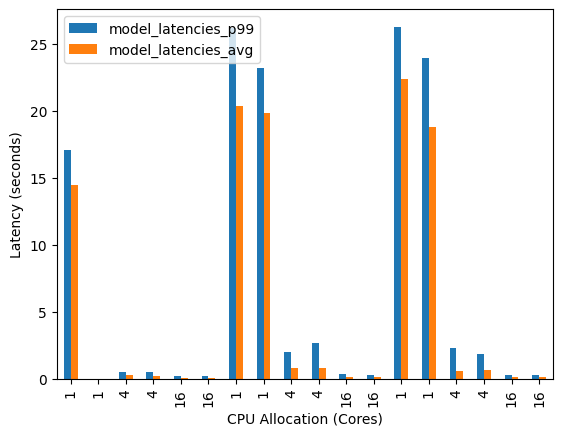

In [18]:
experiment_ids = key_config_df[
    (key_config_df['model_variant'] == 'resnet18') &
    (key_config_df['load'] == 1)]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (Cores)")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,resnet18,1,1,17.100135,976.668030,14.459721
1,resnet18,1,1,NaN,1445.746891,NaN
2,resnet18,1,1,8.272669,167.908962,4.918241
3,resnet18,1,1,NaN,646.529100,NaN
4,resnet18,1,1,31.369402,149.374726,24.050368
5,resnet18,1,1,NaN,651.952823,NaN
6,resnet18,1,4,0.501752,23.372687,0.263209
7,resnet18,1,4,0.500577,135.032766,0.215878
8,resnet18,1,4,0.892363,479.012991,0.484663
9,resnet18,1,4,0.888279,1725.412425,0.449584


Text(0, 0.5, 'Latency (seconds)')

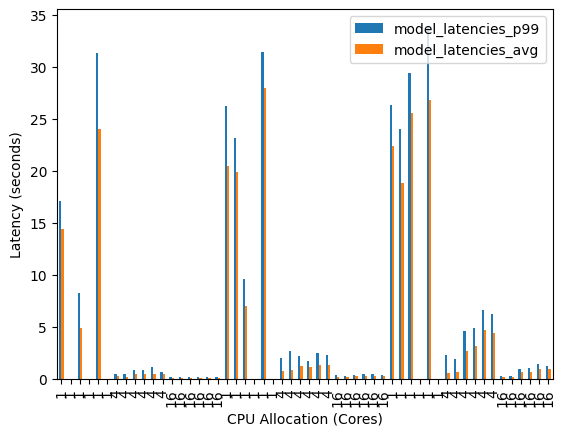

In [16]:
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'resnet18']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])
ax.set_xlabel("CPU Allocation (Cores)")
ax.set_ylabel("Latency (seconds)")

<AxesSubplot: xlabel='cpu_request'>

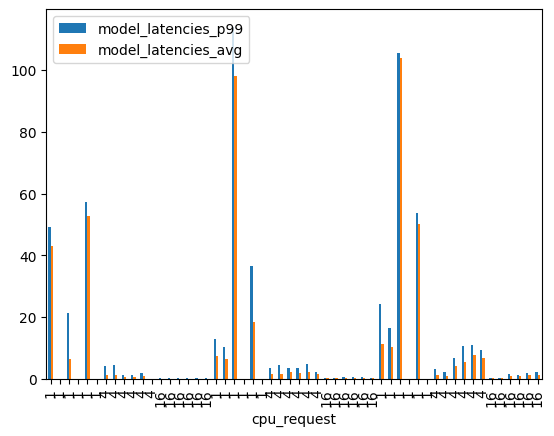

In [14]:
model_variant = 'resnet50'
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])